In [ ]:
#pip install xgboost

In [ ]:
#!pip install plotnine

In [40]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from sklearn.metrics import accuracy_score

%matplotlib inline


In [8]:
#Import the data

# trainData = pd.read_csv('./train_data.csv')
# testData = pd.read_csv('./test_data.csv')

#Load data

# trainData = pd.read_csv('./train_data.csv')
# testData = pd.read_csv('./test_data.csv')

# data = './train_data.csv'
# df = pd.read_csv(data)

#Load data

trainData = pd.read_csv('train_data.csv')
testData = pd.read_csv('test_data.csv')

trainData.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [9]:
#Drop missing values

trainData = trainData.dropna()
trainData.reset_index()
trainData

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,375729,1.0,0.866667,8/27/16,312.05,23.13,27.20,20.25,24.43,18.35,...,-15.64,-75.68,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77
375730,375730,1.0,0.866667,8/28/16,305.82,23.13,27.20,20.25,24.43,18.35,...,-7.59,-76.42,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10
375731,375731,1.0,0.866667,8/29/16,311.62,23.13,27.20,20.25,24.43,18.35,...,-6.25,-70.65,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28
375732,375732,1.0,0.866667,8/30/16,304.54,23.13,27.20,20.25,24.43,18.35,...,-7.16,-57.67,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22


In [10]:
#Find which variables are strings/continuous (objects)

typesDF = pd.DataFrame(trainData.dtypes)

typesDF


,0
index,int64
lat,float64
lon,float64
startdate,object
contest-pevpr-sfc-gauss-14d__pevpr,float64
...,...
wind-vwnd-925-2010-16,float64
wind-vwnd-925-2010-17,float64
wind-vwnd-925-2010-18,float64
wind-vwnd-925-2010-19,float64


In [11]:
#Create list of predictor variables
preds = list(trainData)

preds.remove('index')
preds.remove('lat')
preds.remove('startdate')
preds.remove('climateregions__climateregion')
preds.remove('mjo1d__phase')
preds.remove('mei__meirank')
preds.remove('mei__nip')
preds.remove('contest-tmp2m-14d__tmp2m')

X = trainData[preds]
y = trainData['contest-tmp2m-14d__tmp2m']


In [83]:
df2_group=trainData[['startdate','contest-tmp2m-14d__tmp2m']]
#select only two columns
df2_group.columns=['startdate','contest-tmp2m-14d__tmp2m']
df2_group.head()


,startdate,contest-tmp2m-14d__tmp2m
0,9/1/14,28.744480
1,9/2/14,28.370585
2,9/3/14,28.133059
3,9/4/14,28.256798
4,9/5/14,28.372353


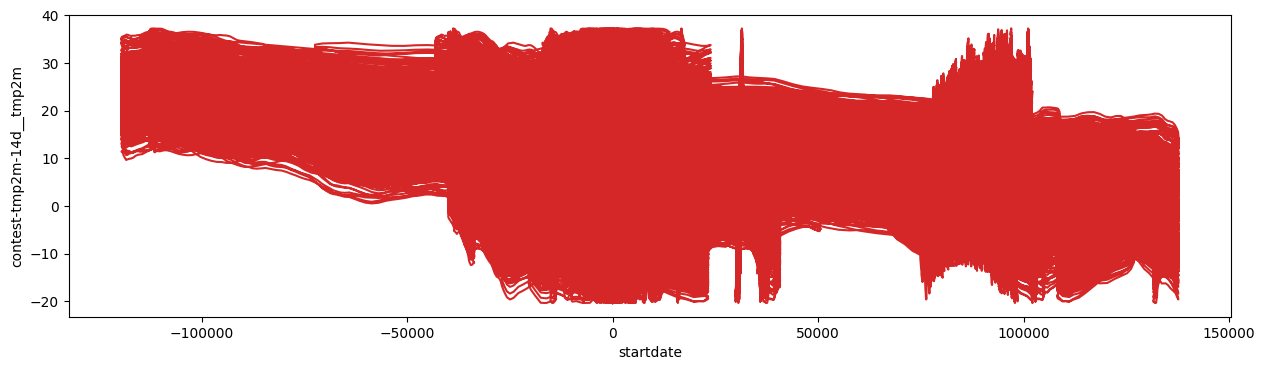

NameError: name 'dpi' is not defined

In [85]:
# in progress
plot_df(testData, X, y, title="", xlabel='startdate', ylabel='contest-tmp2m-14d__tmp2m')#, dpi=100)
plt.figure(figsize=(15,4), dpi=dpi)
plt.plot(X, y, color='tab:red')
plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
plt.show()
    

plot_df(testData, x=testData['startdate'], y=testData['contest-tmp2m-14d__tmp2m'], title='contest temperature from 9/1/14')

## **LINEAR REGRESSION**

In [12]:
#Simple linear 

#Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,
                                                  random_state = 5)

In [36]:
#Standardize/Z score

# z = StandardScaler()
# X_train[preds] = z.fit_transform(X_train[preds])
# X_val[preds] = z.transform(X_val[preds])

In [48]:
#Create and fit model
# lr = LinearRegression()
# lr.fit(X_train, y_train)

In [49]:
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [50]:
SEED = 42

In [52]:
model_lin = LinearRegression().fit(X, y)

In [54]:
# # Find the coefficient of determination 
coef_of_det = model_lin.score(X, y)
print('Determination coefficient:', coef_of_det)

Determination coefficient: 0.9822597269631956


In [55]:
# #Interception between data   # check .....
#print('Intercept is:', model_lin.intercept_)

Intercept is: 463.0261284905969


In [57]:
# #Slope
#print('Slope is:', model_lin.coef_) 

In [89]:
# # Print prediction:
y_pred = model_lin.predict(X_val)
print('Prediction:', y_pred, sep='\n')
#plt.scatter(X, y_pred);
#plt.show()



Prediction:
[19.41158852 17.89252993  1.0902423  ... 11.24632857  6.98107132
 19.37017231]


In [42]:
#Predictions

y_pred = lr.predict(X_val)

In [46]:
from sklearn.linear_model import LinearRegression
np.random.seed(42) 

In [63]:
#Training MSE
print('Train MSE: ', mean_squared_error(y_train, lr.predict(X_train)))

#Testing MSE
print('Test MSE: ', mean_squared_error(y_val, y_pred))

Train MSE:  1.756318935628491
Test MSE:  1.7468131238935276


In [64]:
#Training R2
print('Train R2: ', lr.score(X_train, y_train))

#Testing R2
print('Test R2: ', lr.score(X_val, y_val))

Train R2:  0.9822431134914706
Test R2:  0.982311251557162


In [65]:
# ################# ------print interception data
#print(lr.intercept_)

In [66]:
testData['index']

0        375734
1        375735
2        375736
3        375737
4        375738
          ...  
31349    407083
31350    407084
31351    407085
31352    407086
31353    407087
Name: index, Length: 31354, dtype: int64

In [67]:
#Predict on the test data

finalPreds = lr.predict(testData[preds])

In [78]:
# #Create dataframe to store the results
# res = pd.DataFrame(finalPreds, columns = ['contest-tmp2m-14d__tmp2m'])

# res['startdate'] = testData['startdate']

# res

,contest-tmp2m-14d__tmp2m,startdate
0,27.727076,11/1/22
1,27.635880,11/2/22
2,27.390594,11/3/22
3,27.265669,11/4/22
4,27.212049,11/5/22
...,...,...
31349,6.334028,12/27/22
31350,6.304296,12/28/22
31351,5.244093,12/29/22
31352,5.685833,12/30/22


In [68]:
#Create dataframe to store the results
results = pd.DataFrame(finalPreds, columns = ['contest-tmp2m-14d__tmp2m'])

results['index'] = testData['index']

results

,contest-tmp2m-14d__tmp2m,index
0,27.727076,375734
1,27.635880,375735
2,27.390594,375736
3,27.265669,375737
4,27.212049,375738
...,...,...
31349,6.334028,407083
31350,6.304296,407084
31351,5.244093,407085
31352,5.685833,407086


In [69]:
results.to_csv('solution.csv', index = False)

In [ ]:
#startdate

In [76]:
#Create dataframe to store the results
res = pd.DataFrame(finalPreds, columns = ['contest-tmp2m-14d__tmp2m'])

res['startdate'] = testData['startdate']

res

,contest-tmp2m-14d__tmp2m,startdate
0,27.727076,11/1/22
1,27.635880,11/2/22
2,27.390594,11/3/22
3,27.265669,11/4/22
4,27.212049,11/5/22
...,...,...
31349,6.334028,12/27/22
31350,6.304296,12/28/22
31351,5.244093,12/29/22
31352,5.685833,12/30/22


In [91]:
# from datetime import datetime
# import pandas as pd
# import matplotlib.pyplot as plt

# #data = pd.read_csv('path_to_file/stock.csv')
# df = pd.DataFrame(testData, columns = ['startdate, contest-tmp2m-14d__tmp2m'])

# # Set the Date as Index
# df['startdate'] = pd.to_datetime(df['startdate'])
# df.index = df['startdate']
# del df['startdate']


# df.plot(figsize=(15, 6))
# plt.show()

In [101]:
#plot_sta = stats.probplot(testData['contest-tmp2m-14d__tmp2m'], plot=plt)

## **PCA**

In [22]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [23]:
#Grab the numeric columns of interest


In [24]:
#Create and fit PCA model
pca = PCA()
pca.fit(trainData[preds])

PCA()

In [103]:
#pcaDF = pd.DataFrame({'expl_var': pca.explained_variance_ratio_,
                      'pc': range(1,242),
                      'cum_var': pca.explained_variance_ratio_.cumsum()})
#pcaDF.head()

IndentationError: unexpected indent (3513228766.py, line 2)

## **XGBOOST**

In [26]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

ModuleNotFoundError: No module named 'hyperopt'

In [20]:
from xgboost.sklearn import XGBRegressor
#XGBoost

#Split the data into seperate training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                  random_state = 5)

#Initialize domain space for range of values
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

#Define objective function
def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = r2_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

#Optimize 
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : " , "\n")
print(best_hyperparams)
 
#Define the xgboost regression model
#model = XGBRegressor(n_estimators = 100, max_depth = 7, eta = 0.1, subsample = 0.7, 
#                     colsample_bytree = 0.8)

#Train the model
#model.fit(X_train, y_train)


#Predictions
#y_pred = model.predict(X_val)


[19:07:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SCORE:
-1.3105751118301212
[19:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
  1%|          | 1/100 [02:59<4:56:08, 179.48s/it, best loss: 1.3105751118301212]


KeyboardInterrupt: ignored

In [99]:
#Training MSE
print(mean_squared_error(y_train, model.predict(X_train)))

#Testing MSE
print(mean_squared_error(y_val, y_pred))

NameError: name 'model' is not defined

In [ ]:
#True vs Pred values
true_vs_pred = pd.DataFrame({"Predicted": y_pred,
                             "True": y_val})

true_vs_pred

,Predicted,True
139,15.223826,15.581706
3891,24.182001,24.199463
1200,19.074888,19.327484
513,14.759494,14.739788
3400,15.579511,15.616957
...,...,...
3597,30.352280,30.332256
2194,28.102617,28.001118
1257,19.616619,19.911329
3828,9.893395,9.952442


In [96]:
testData.shape

(31354, 245)

In [97]:
#Plot
(ggplot(true_vs_pred, aes(x = 'True', y = 'Predicted')) + geom_point())

NameError: name 'true_vs_pred' is not defined

In [98]:
#Predict on the test data

finalPreds = model.predict(testData[preds])

NameError: name 'model' is not defined

In [ ]:
#Create dataframe to store the results
results = pd.DataFrame(finalPreds, columns = ['contest-tmp2m-14d__tmp2m'])

results['index'] = testData['index']

results

,contest-tmp2m-14d__tmp2m,index
0,29.491295,375734
1,29.572853,375735
2,29.613876,375736
3,29.596071,375737
4,29.579565,375738
...,...,...
31349,17.761332,407083
31350,17.900648,407084
31351,17.336828,407085
31352,17.293425,407086


In [ ]:
results.to_csv('solution.csv', index = False)